In [1]:
import pandas as pd
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner import Plot
from RoutePlanner.TemporalCellGrid import TemporalCellGrid

In [2]:
OptInfo = {}
X     = [230,360]
Y     = [-80,-40]
d     = [5,2.5]
OptInfo['Start Time']           = '2014-02-07'
OptInfo['End Time']             = '2014-02-08'
OptInfo['WayPoints']            = '../../resources/WayPoints.csv'
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = False
OptInfo['VariableSpeed']        = True
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

iceDataPath = "../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc"
currentDataPath = "../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc"

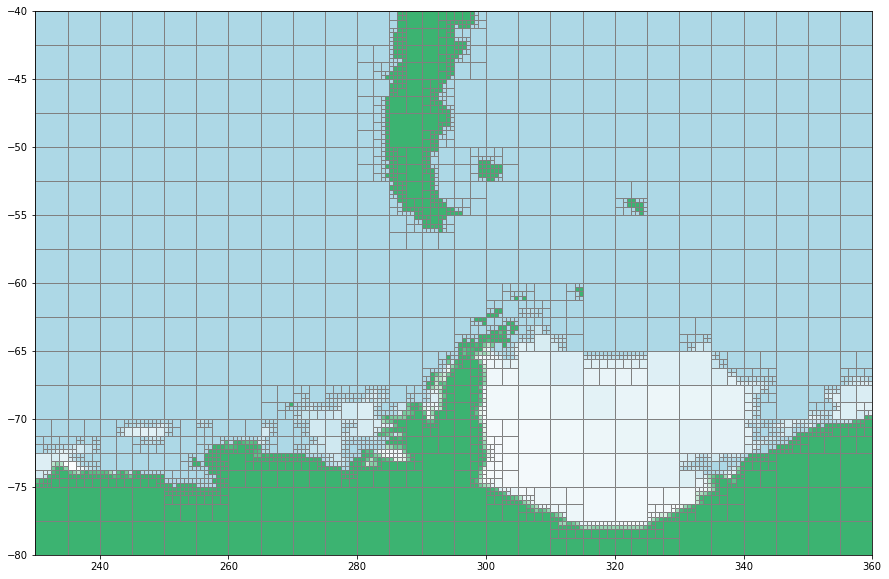

In [3]:
temporalCellGrid = TemporalCellGrid(X[0], X[1], Y[0], Y[1], d[0], d[1])
temporalCellGrid.addIcePoints(iceDataPath, OptInfo['Start Time'], OptInfo['End Time'])
temporalCellGrid.addCurrentPoints(currentDataPath)
cellGrid = temporalCellGrid.getGrid(OptInfo['Start Time'])
cellGrid.recursiveSplit(3)
cellGrid.plot()

In [4]:
TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(source_waypoints=['MargueriteBay'],verbrose=True)

=== Processing Waypoint = MargueriteBay ===


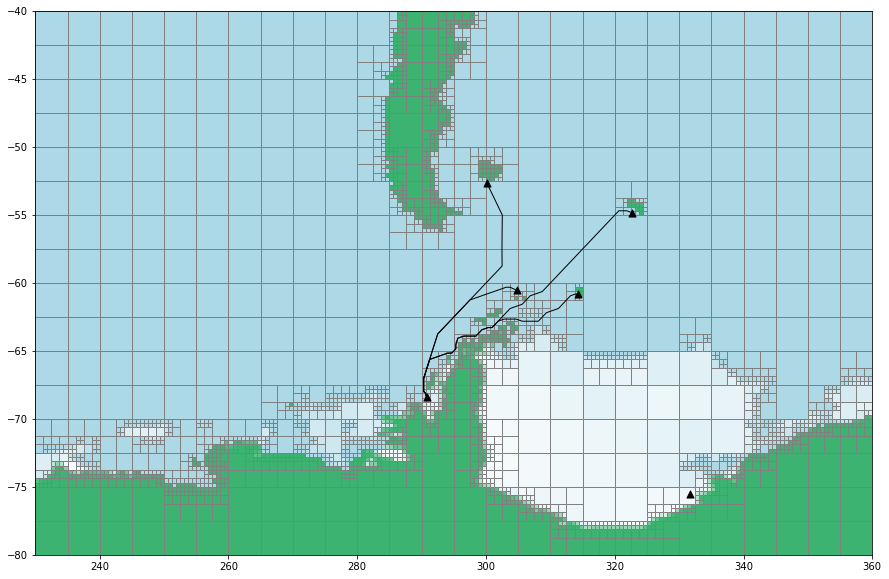

In [7]:
cellGrid.plot(paths=Paths,waypoints=TT.OptInfo['WayPoints'])

In [14]:
map = Plot.BaseMap(logo=False)
map = Plot.MapMesh(cellGrid,map)
map = Plot.MapWaypoints(pd.read_csv('../../resources/WayPoints.csv'),map)
map = Plot.MapPaths(Paths,map,PathPoints=False)
map = Plot.TimeMapPaths(Paths,map,starttime=OptInfo['Start Time'])
map = Plot.LayerControl(map,collapsed=True)
map

In [11]:
map.save('TimeVaryingPaths.html')

In [5]:
# SmoothedPaths = TT.PathSmoothing(Paths,maxiter=1000, minimumDiff=0.0001)

In [6]:
# map = Plot.BaseMap(logo=False)
# map = Plot.MapMesh(cellGrid,map)
# map = Plot.MapWaypoints(pd.read_csv('../../resources/WayPoints.csv'),map)
# map = Plot.MapPaths(SmoothedPaths,map)
# #map = Plot.TimeMapPaths(Paths,map,starttime=OptInfo['Start Time'])
# map = Plot.LayerControl(map,collapsed=True)
# map